# Directory, Libraries and Data

In [2]:
#libraries 
import pandas as pd
import numpy as np

In [3]:
#Load the Data
df = pd.read_csv("marketing_campaign.csv")
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


# Data Preparation

In [4]:
#Remove unwanted variables
df = df.iloc[:,2:]
df = df.drop(columns = ["Dt_Customer", "Recency"])
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0


In [5]:
#Transform Year of Birth into Age
df['age'] = 2020 - df.Year_Birth
df = df.drop(columns = 'Year_Birth')

In [6]:
#Transform Objects 
df = pd.get_dummies(df, drop_first= True)

In [7]:
#NAs
df = df.dropna()
df.isna().sum()

Income                     0
Kidhome                    0
Teenhome                   0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
age                        0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [8]:
#Isolate X and Y
y = df.Income
X = df.drop(columns = "Income")

In [9]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Random Forest

In [10]:
#Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300,
                              random_state =1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

# Accuracy Assessment

In [11]:
#Predictions
predictions = model.predict(X_test)
predictions[:5]

array([66488.74      , 19450.09666667, 64682.58      , 49538.68666667,
       47827.66666667])

In [12]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6543.338626126127
50734.41891891892
22073.552789063204


# Feature Importance

<Axes: >

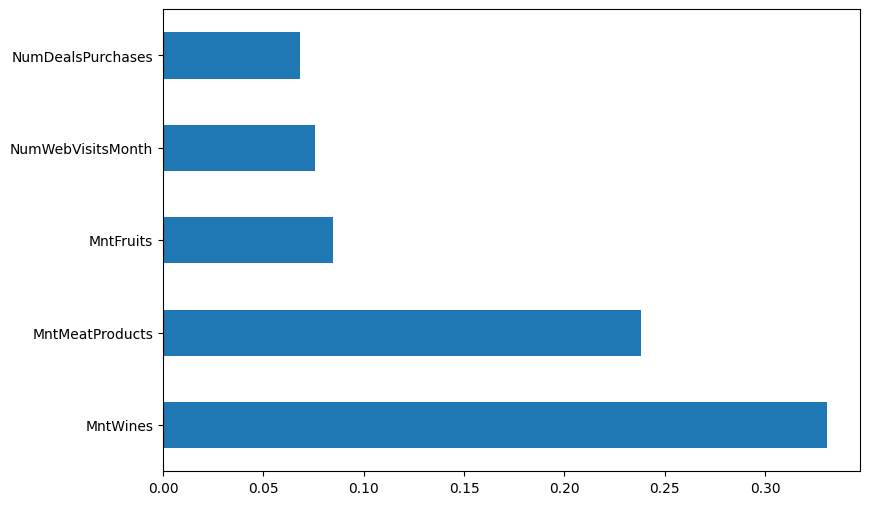

In [13]:
#Importance plot
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = "barh",
                            figsize =(9,6))

# Parameter Tuning

In [14]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50, 500, 20)}
grid = ParameterGrid(param_grid)

In [15]:
#Parameter Tuning
mae = []

#Start the loop
for params in grid:
  #model building
  model = RandomForestRegressor(n_estimators= params['n_estimators'],
                                random_state = 1502)
  model.fit(X_train, y_train)

  #predictions
  predictions = model.predict(X_test)

  #Assess Accuracy
  error = mean_absolute_error(y_test, predictions)
  mae.append(error)

#best parameters
best_params = grid[np.argmin(error)]
print(best_params)

{'n_estimators': 50}
